In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from planeIdentification import *
from sklearn.cluster import DBSCAN, KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import shutil
import os
import time
import itertools
import tqdm
import laspy

In [9]:
basePath = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/"
neighborhood = "Test_70_el Besòs i el Maresme"

experimentList = []
minSilhouetteList = []
avgSilhouetteList = []
maxSilhouetteList = []

baseOutputFolder = basePath + "/Results/" + neighborhood + "/Testing Plane ID/"
for experiment in os.listdir(baseOutputFolder):
    metricsFile = parcelsFolder = baseOutputFolder + experiment + "/metrics.csv"
    metricsDF = pd.read_csv(metricsFile)
    experimentList.append(experiment)
    minSilhouetteList.append(metricsDF.silhouetteScore.min())
    avgSilhouetteList.append(metricsDF.silhouetteScore.mean())
    maxSilhouetteList.append(metricsDF.silhouetteScore.max())

allMetricsDF = pd.DataFrame({
    "experiment":experimentList,
    "min": minSilhouetteList,
    "avg": avgSilhouetteList,
    "max": maxSilhouetteList
})

allMetricsDF

,experiment,min,avg,max
0,KPlanes_distance_threshold_0.5__useDistanceSam...,0.465851,0.641456,0.970308
1,GradientDBSCAN_distance_threshold_0.5__squareS...,0.000000,0.488682,0.933120
2,GradientDBSCAN_distance_threshold_0.5__squareS...,0.000000,0.203659,0.700996
3,GradientDBSCAN_distance_threshold_0.5__squareS...,0.000000,0.284598,0.773235
4,KPlanes_distance_threshold_0.5__useDistanceSam...,0.417079,0.617515,0.871085
...,...,...,...,...
195,GradientDBSCAN_distance_threshold_0.5__squareS...,0.000000,0.374657,0.987685
196,GradientDBSCAN_distance_threshold_0.5__squareS...,0.000000,0.374657,0.987685
197,GradientDBSCAN_distance_threshold_0.5__squareS...,0.000000,0.481147,0.776775
198,GradientDBSCAN_distance_threshold_0.5__squareS...,0.000000,0.342400,0.944295


In [19]:
DBSCANMetrics = allMetricsDF[allMetricsDF.experiment.str.startswith("GradientDBSCAN")]
DBSCANMetrics = DBSCANMetrics.sort_values("avg", ascending=False).reset_index(drop=True)

In [28]:
names = DBSCANMetrics.experiment
names[0]

'GradientDBSCAN_distance_threshold_0.5__squareSize_0.25_polar_False_DBSCANeps_1_DBSCANminSamples_4'

In [47]:
squareSize = [float(name.split("squareSize_")[1].split("_")[0]) for name in names]
polar = [(name.split("polar_")[1].split("_")[0] == 'True') for name in names]
DBSCANeps = [float(name.split("DBSCANeps_")[1].split("_")[0]) for name in names]
DBSCANminSamples = [float(name.split("DBSCANminSamples_")[1].split("_")[0]) for name in names]
scores = DBSCANMetrics.avg.values

In [48]:
scores

array([0.60595427, 0.60595427, 0.60595427, 0.60595427, 0.60595427,
       0.60595427, 0.60595427, 0.60595427, 0.60066735, 0.60066735,
       0.60066735, 0.60066735, 0.60066735, 0.60066735, 0.60066735,
       0.60066735, 0.5593895 , 0.5593895 , 0.5593895 , 0.5593895 ,
       0.5593895 , 0.5593895 , 0.5593895 , 0.5593895 , 0.52907804,
       0.52907804, 0.52907804, 0.52907804, 0.52907804, 0.52907804,
       0.52907804, 0.52907804, 0.48868168, 0.48868168, 0.48868168,
       0.48868168, 0.48868168, 0.48868168, 0.48868168, 0.48868168,
       0.4832733 , 0.4832733 , 0.4832733 , 0.4832733 , 0.4832733 ,
       0.4832733 , 0.4832733 , 0.4832733 , 0.48141627, 0.48114729,
       0.48114729, 0.48114729, 0.48114729, 0.48114729, 0.48114729,
       0.48114729, 0.40417848, 0.40417848, 0.40417848, 0.40417848,
       0.40417848, 0.40417848, 0.40417848, 0.40417848, 0.37465686,
       0.37465686, 0.37465686, 0.37465686, 0.37465686, 0.37465686,
       0.37465686, 0.37465686, 0.36586857, 0.36586857, 0.36586

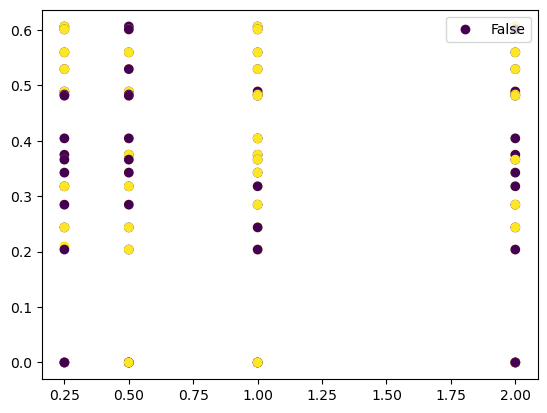

In [62]:
plt.scatter(squareSize, DBSCANMetrics["avg"].values, c=polar)
plt.legend(np.unique(polar))